<a href="https://colab.research.google.com/github/Rivianee/data-science/blob/master/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


#Dados internacionais
c=pd.read_csv('/content/time-series-19-covid-combined.csv', sep= ',')
df_sumario_w = c.groupby(['Date','Country/Region'],as_index = False)['Confirmed','Deaths'].sum().pivot('Date','Country/Region').fillna(0)
df_conf_w = df_sumario_w["Confirmed"]
df_deaths_w = df_sumario_w["Deaths"]



<ipython-input-3-093bf5531369>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumario_w = c.groupby(['Date','Country/Region'],as_index = False)['Confirmed','Deaths'].sum().pivot('Date','Country/Region').fillna(0)
<ipython-input-3-093bf5531369>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_sumario_w = c.groupby(['Date','Country/Region'],as_index = False)['Confirmed','Deaths'].sum().pivot('Date','Country/Region').fillna(0)


In [ ]:
#Dados População Internacionais
popw = pd.read_excel('../input/cpia-local-de-covid19-ecdc-dataset/COVID-19-geographic-disbtribution-world.xlsx')
popw["countriesAndTerritories"] = popw["countriesAndTerritories"].str.replace("United_States_of_America", "US", case = False)
popw['countriesAndTerritories'] = popw['countriesAndTerritories'].str.replace("_"," ")
pop = popw.groupby('countriesAndTerritories', as_index=False).max()[['countriesAndTerritories','popData2018']]
pop.rename(columns={'countriesAndTerritories':'local', 'popData2018':'pop'}, inplace=True);

In [4]:
# Por dia
def acum2pd(df_conf):
    
    df_conf_pd = df_conf.copy()

    for col in df_conf.columns:
        for i,x in enumerate(df_conf_pd[col]):
            if i != 0:
                pdia = df_conf[col][i]-df_conf[col][i-1]
                if pdia < 0:
                    df_conf_pd[col][i] = 0
                    df_conf[col][i] = df_conf[col][i-1]
                else:
                    df_conf_pd[col][i] = pdia
    return df_conf_pd

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sigm_predict(y, future_days, boundary):
    def avg_err(pcov):
        return np.round(np.sqrt(np.diag(pcov)).mean(), 2)
    # function to be minimized
    def f_sigmoid(x, a, b, c):
        # a = sigmoid midpoint
        # b = curve steepness (logistic growth)
        # c = max value
        return (c / (1 + np.exp(-b*(x-a))))
  
    x = np.arange(len(y))
    
    # fitting the data on the logistic function
    #boundary = ([-np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf])
    #boundary = ([0., 0.001, y.max()],[90., 2.5, 100*y.max()])
    popt_sig, pcov_sig = curve_fit(f_sigmoid, x[:-1], y[:-1], method='trf',bounds=boundary)#,sigma = np.linspace(0.5, 0.05, len(y)),absolute_sigma=True)#dogbox, sigma = np.linspace(0.5, 0.05, len(y)),absolute_sigma=False
    peakday = len(y) + int(popt_sig[0])
     
    x_m = np.arange(len(y)+future_days)
    y_m = f_sigmoid(x_m, *popt_sig)    
    
    return x_m, y_m, avg_err(pcov_sig), popt_sig

In [6]:
df_conf_w.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-06,3392.0,832.0,4997.0,751.0,36.0,25.0,5208.0,2782.0,6894.0,15684.0,...,202359.0,673.0,2233.0,379.0,271.0,374.0,6.0,25.0,146.0,34.0
2020-05-07,3563.0,842.0,5182.0,752.0,36.0,25.0,5371.0,2884.0,6913.0,15752.0,...,207977.0,684.0,2298.0,381.0,288.0,375.0,6.0,25.0,153.0,34.0
2020-05-08,3778.0,850.0,5369.0,752.0,43.0,25.0,5611.0,3029.0,6918.0,15774.0,...,212629.0,694.0,2325.0,388.0,288.0,375.0,6.0,34.0,167.0,34.0
2020-05-09,4033.0,856.0,5558.0,754.0,43.0,25.0,5776.0,3175.0,6939.0,15833.0,...,216525.0,702.0,2349.0,402.0,288.0,375.0,6.0,34.0,252.0,35.0
2020-05-10,4402.0,868.0,5723.0,755.0,45.0,25.0,6034.0,3313.0,6948.0,15871.0,...,220449.0,707.0,2418.0,414.0,288.0,375.0,6.0,51.0,267.0,36.0


In [7]:
df_deaths_w.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-06,104.0,31.0,476.0,46.0,2.0,3.0,273.0,40.0,97.0,608.0,...,30150.0,17.0,10.0,10.0,0.0,2.0,0.0,5.0,4.0,4.0
2020-05-07,106.0,31.0,483.0,47.0,2.0,3.0,282.0,42.0,97.0,609.0,...,30689.0,17.0,10.0,10.0,0.0,2.0,0.0,5.0,4.0,4.0
2020-05-08,109.0,31.0,488.0,47.0,2.0,3.0,293.0,43.0,97.0,614.0,...,31316.0,18.0,10.0,10.0,0.0,2.0,0.0,7.0,4.0,4.0
2020-05-09,115.0,31.0,494.0,48.0,2.0,3.0,300.0,44.0,97.0,615.0,...,31662.0,18.0,10.0,10.0,0.0,2.0,0.0,7.0,7.0,4.0
2020-05-10,120.0,31.0,502.0,48.0,2.0,3.0,305.0,45.0,97.0,618.0,...,31930.0,19.0,10.0,10.0,0.0,2.0,0.0,8.0,7.0,4.0


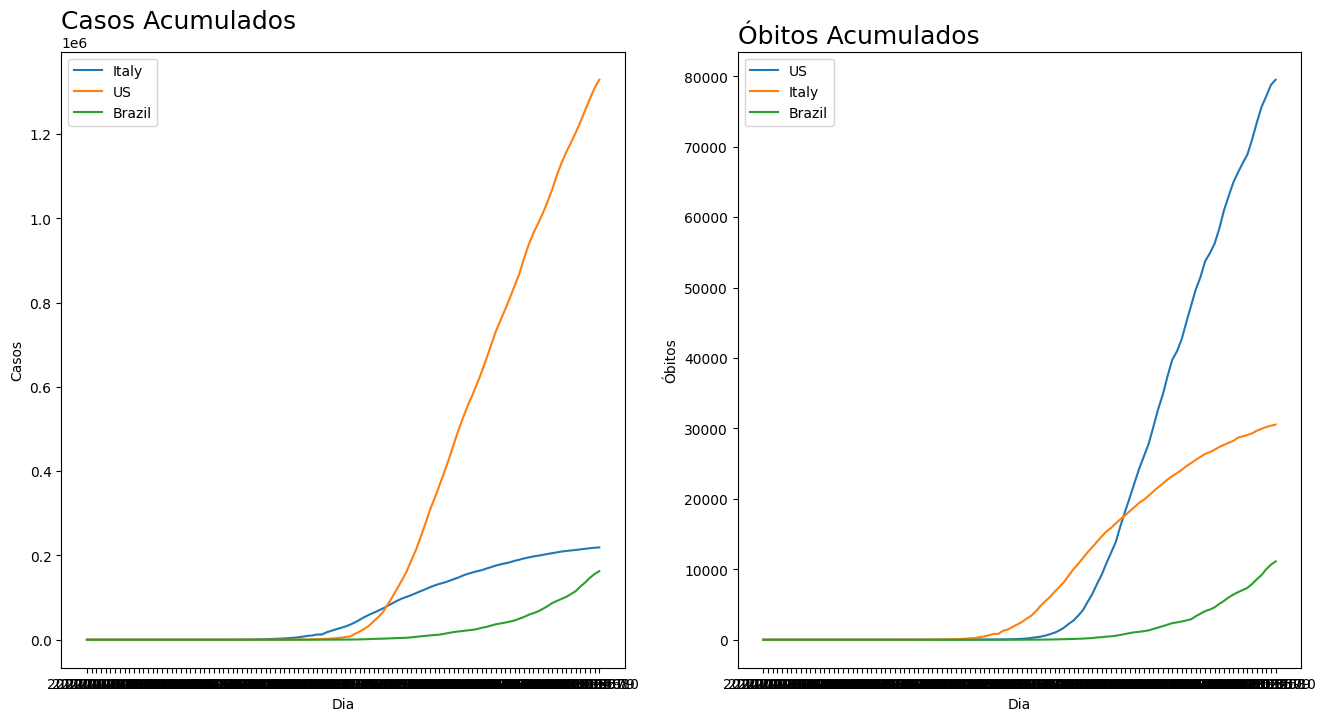

In [31]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
ax.set_title('Casos Acumulados', fontsize=18, loc='left')
plt.plot(df_conf_w['Italy'], label='Italy')
plt.plot(df_conf_w['US'], label='US')
plt.plot(df_conf_w['Brazil'], label='Brazil')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();
ax = plt.subplot(1,2,2)
ax.set_title('Óbitos Acumulados', fontsize=18, loc='left')
plt.plot(df_deaths_w['US'], label='US')
plt.plot(df_deaths_w['Italy'], label='Italy')
plt.plot(df_deaths_w['Brazil'], label='Brazil')
plt.xlabel("Dia")
plt.ylabel("Óbitos")
plt.legend();

In [8]:
df_conf_pd = acum2pd(df_conf_w)
df_deaths_pd = acum2pd(df_deaths_w)

<ipython-input-4-2201db66a986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conf[col][i] = df_conf[col][i-1]


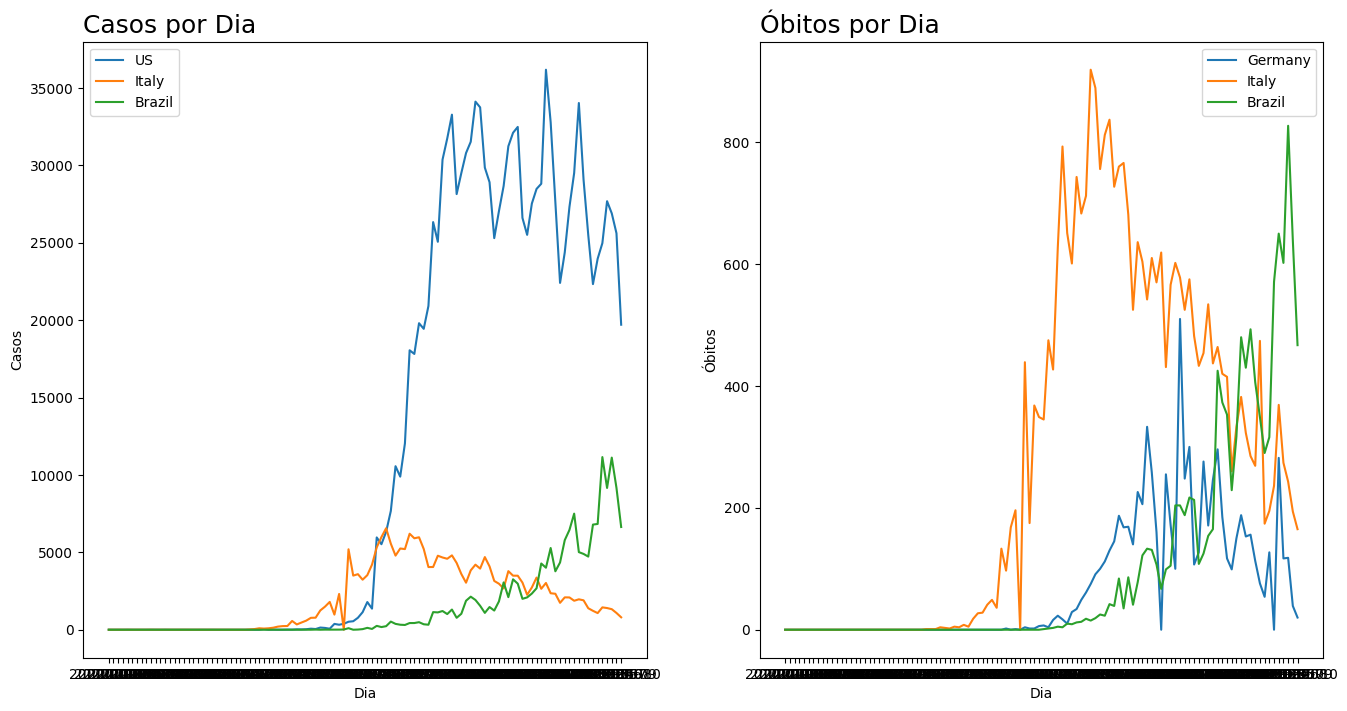

In [32]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
ax.set_title('Casos por Dia', fontsize=18, loc='left')
plt.plot(df_conf_pd['US'], label='US')
plt.plot(df_conf_pd['Italy'], label='Italy')
plt.plot(df_conf_pd['Brazil'], label='Brazil')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();
ax = plt.subplot(1,2,2)
ax.set_title('Óbitos por Dia', fontsize=18, loc='left')
plt.plot(df_deaths_pd['Germany'], label='Germany')
plt.plot(df_deaths_pd['Italy'], label='Italy')
plt.plot(df_deaths_pd['Brazil'], label='Brazil')
plt.xlabel("Dia")
plt.ylabel("Óbitos")
plt.legend();

In [33]:
br = df_conf_pd['US'][:75]
br1 = br.copy()
br1[-1] = br1[-2] + br1[-2] - br1[-3]

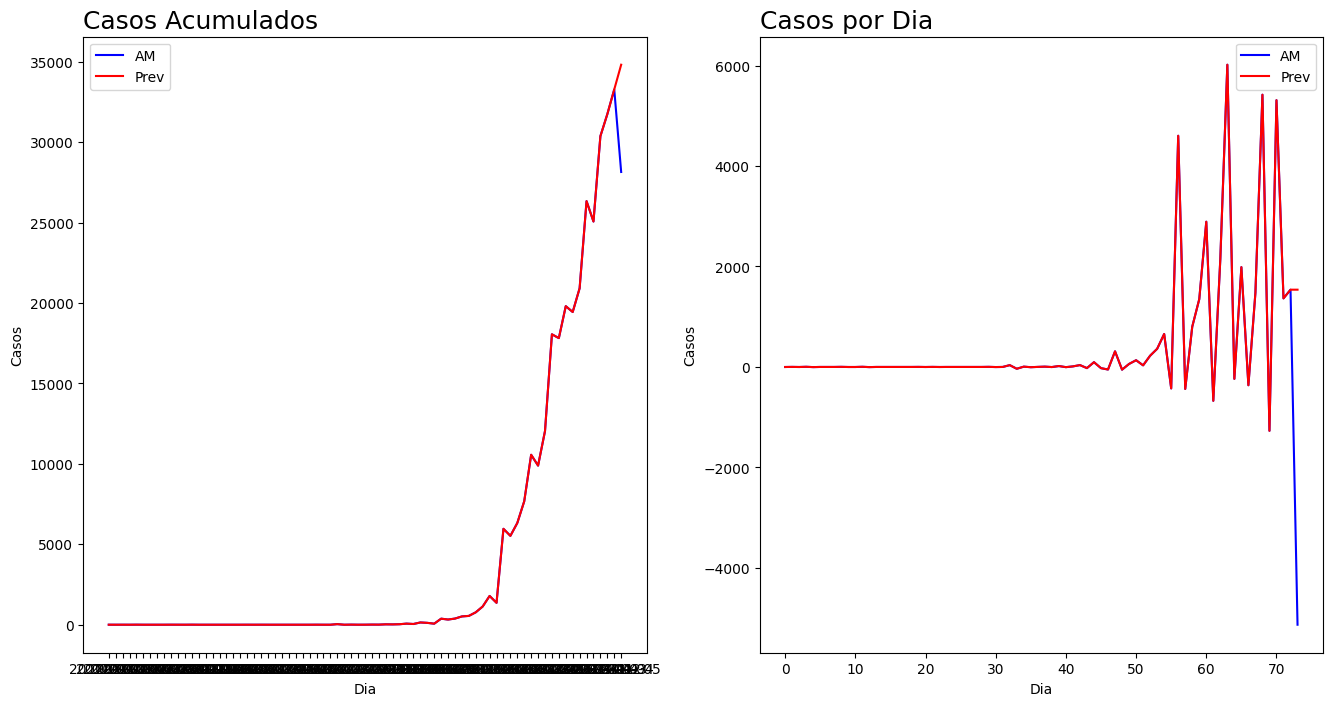

In [34]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
ax.set_title('Casos Acumulados', fontsize=18, loc='left')
plt.plot(br, 'b', label='AM')
plt.plot(br1, 'r', label='Prev')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();
ax = plt.subplot(1,2,2)
ax.set_title('Casos por Dia', fontsize=18, loc='left')
plt.plot(np.diff(br), 'b', label='AM')
plt.plot(np.diff(br1), 'r', label='Prev')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();

In [64]:
#Lib scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np

#A partir do 100o caso
casos_br = df_conf_pd['US'][df_conf_pd[df_conf_pd['US'] > 100].index[0]:].values
#Dividindo os dados do passado e os a serem previstos
casos_br_treino = casos_br[:-5]
casos_br_teste = casos_br[-5:]
#Instanciando o modelo
model = LinearRegression()
#Botando no formato do fit
X = np.expand_dims(np.linspace(0,len(casos_br_treino), len(casos_br_treino)), axis=1)
y = np.expand_dims(casos_br_treino, axis=1)
#Fazendo o treino
model.fit(X,y)
#Prevendo com dias à frente
casos_br_prev = model.predict(np.expand_dims(np.linspace(0, len(casos_br_treino)+5,len(casos_br)), axis=1))

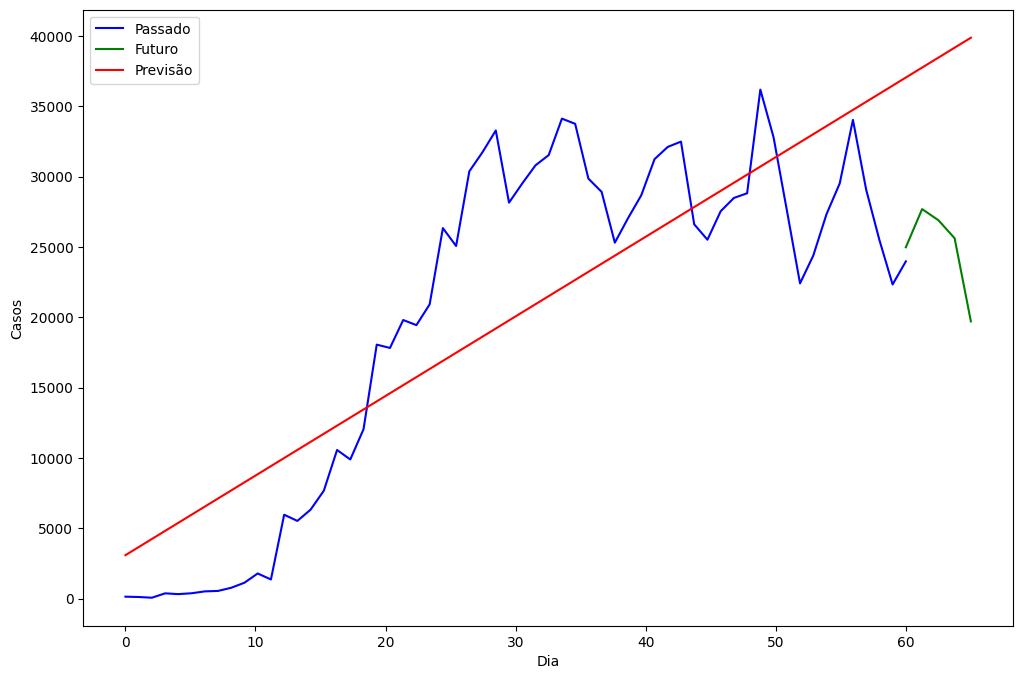

In [65]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,len(casos_br_treino), len(casos_br_treino)), casos_br_treino, 'b', label='Passado')
plt.plot(np.linspace(len(casos_br_treino), len(casos_br_treino)+5, 5), casos_br_teste, 'g', label = 'Futuro')
plt.plot(np.linspace(0, len(casos_br_prev), len(casos_br_prev)), casos_br_prev, 'r', label = 'Previsão')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();

In [66]:
from sklearn.preprocessing import PolynomialFeatures 

# Instanciando Modelo  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
# Treino  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
# Predição
casos_br_prev_poli = lin2.predict(poly.fit_transform(np.expand_dims(np.linspace(0, len(casos_br_treino)+5,len(casos_br)), axis=1)))

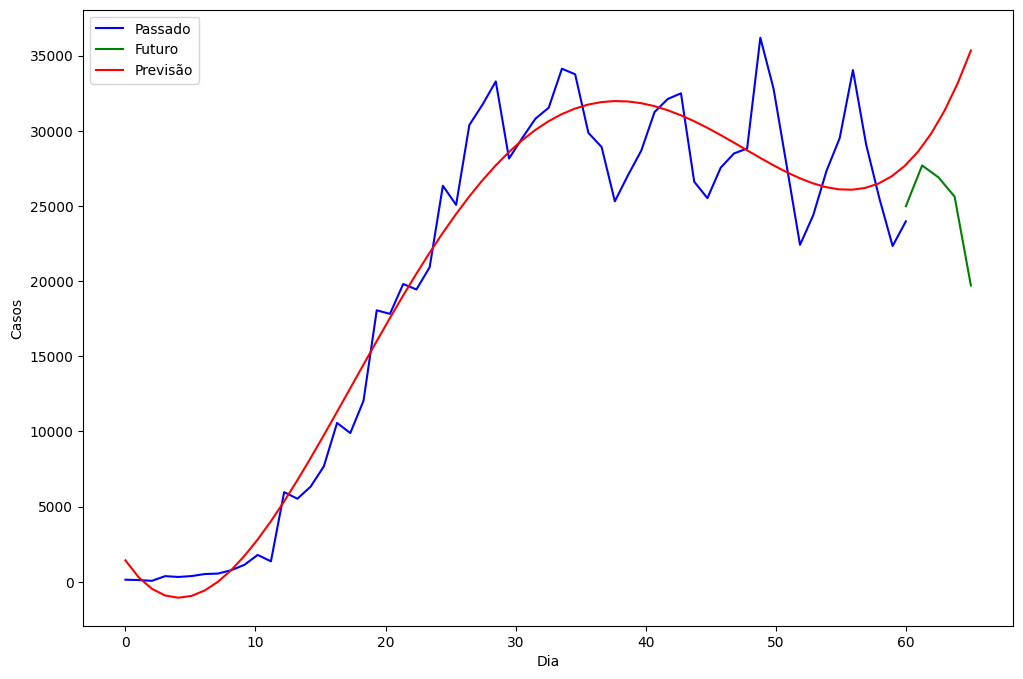

In [67]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,len(casos_br_treino), len(casos_br_treino)), casos_br_treino, 'b', label='Passado')
plt.plot(np.linspace(len(casos_br_treino), len(casos_br_treino)+5, 5), casos_br_teste, 'g', label = 'Futuro')
plt.plot(np.linspace(0, len(casos_br_prev), len(casos_br_prev)), casos_br_prev_poli, 'r', label = 'Previsão')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();

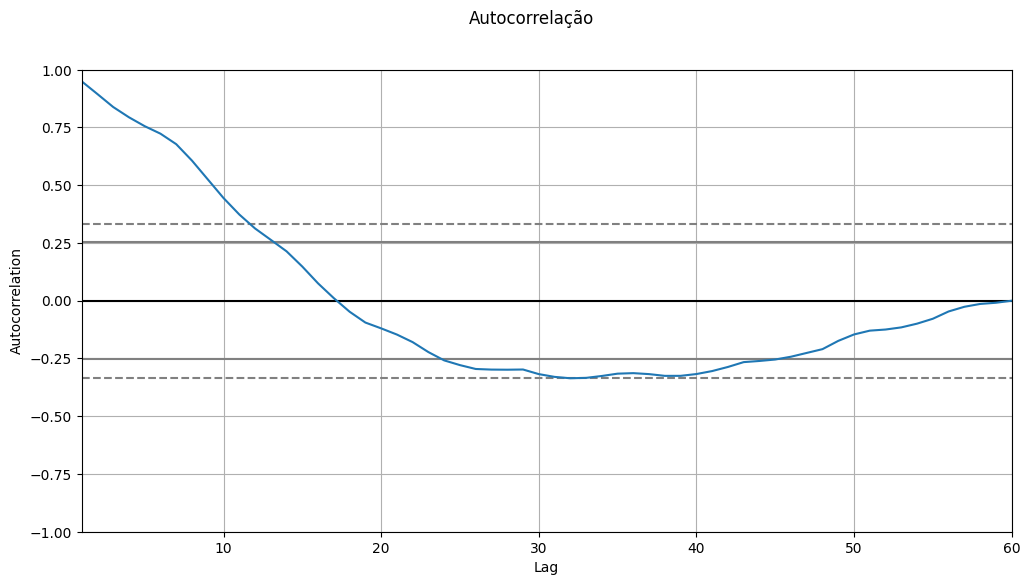

In [68]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12,6))
ax.suptitle("Autocorrelação")
autocorrelation_plot(casos_br_treino)
ax=ax

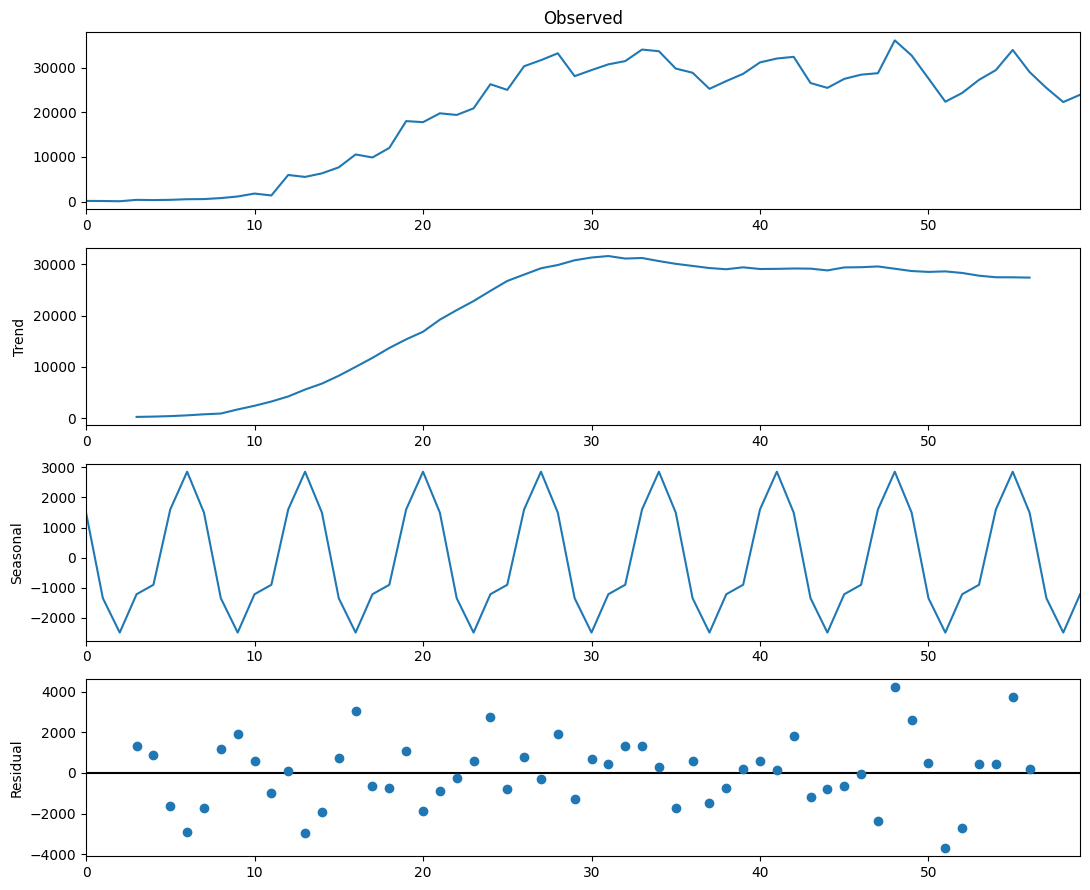

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9

dec = seasonal_decompose(casos_br_treino,period=7)
dec.plot();

In [20]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.7 MB/s eta 0:00:00


In [70]:
from pmdarima import auto_arima

# Instancia modelo já com os melhores parâmetros buscados automaticamente
m_sarima = auto_arima(casos_br_treino,
                     start_p=0, start_q=0, max_p=10, max_q=10,
                     d=1, m=7, seasonal = True,
                     D=1, start_Q=1, start_P=1, max_P=4, max_Q=4,
                     trace=True,
                     error_action='ignore', suppress_warnings=True,
                     stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=971.452, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=962.473, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=963.494, Time=0.15 sec
 ARIMA(0,1,0)(0,1,3)[7]             : AIC=966.108, Time=0.09 sec
 ARIMA(0,1,0)(0,1,4)[7]             : AIC=966.486, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=962.120, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=963.656, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,3)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(1,1,4)[7]             : AIC=966.852, Time=0.71 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=963.828, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=965.412, Time=0.09 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(2,1,3)[7]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=965.646, Time=0.10 sec
 ARIMA(0,1,0)(3,1,1)[7]             : AIC

ValueError: ignored

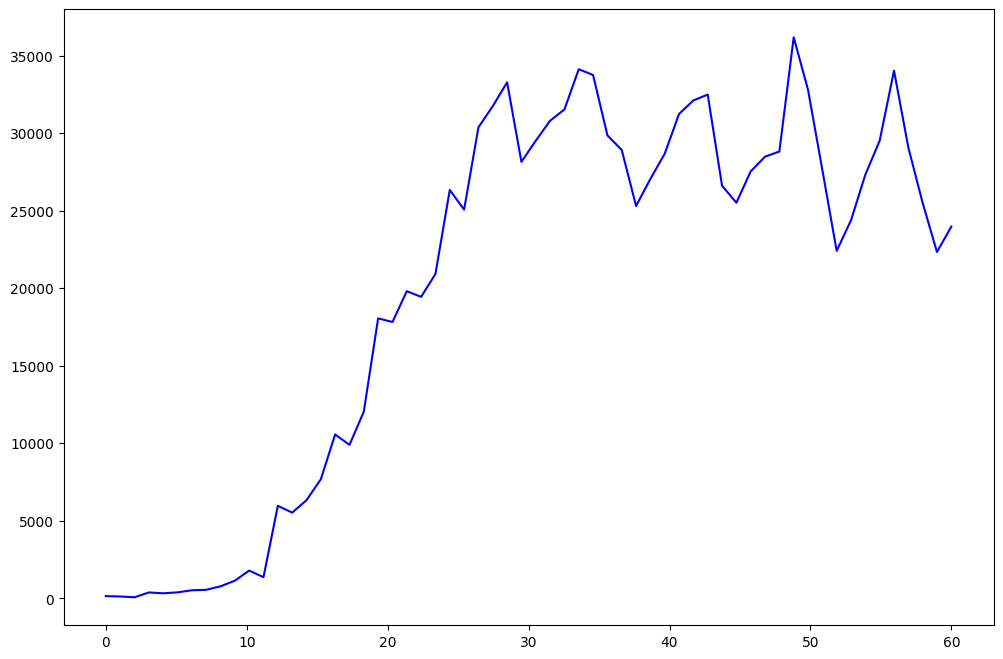

In [71]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,len(casos_br_treino), len(casos_br_treino)), casos_br_treino, 'b', label='Passado')
plt.plot(np.linspace(0,len(casos_br_treino), len(casos_br_treino)), fitted, 'r')
plt.plot(np.linspace(len(casos_br_treino), len(casos_br_treino)+5, 5), casos_br_teste, 'g', label='Futuro')
plt.plot(np.linspace(len(casos_br_treino), len(casos_br_treino)+5, 5), casos_br_prev_sarima, 'r', label='Previsão')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend()

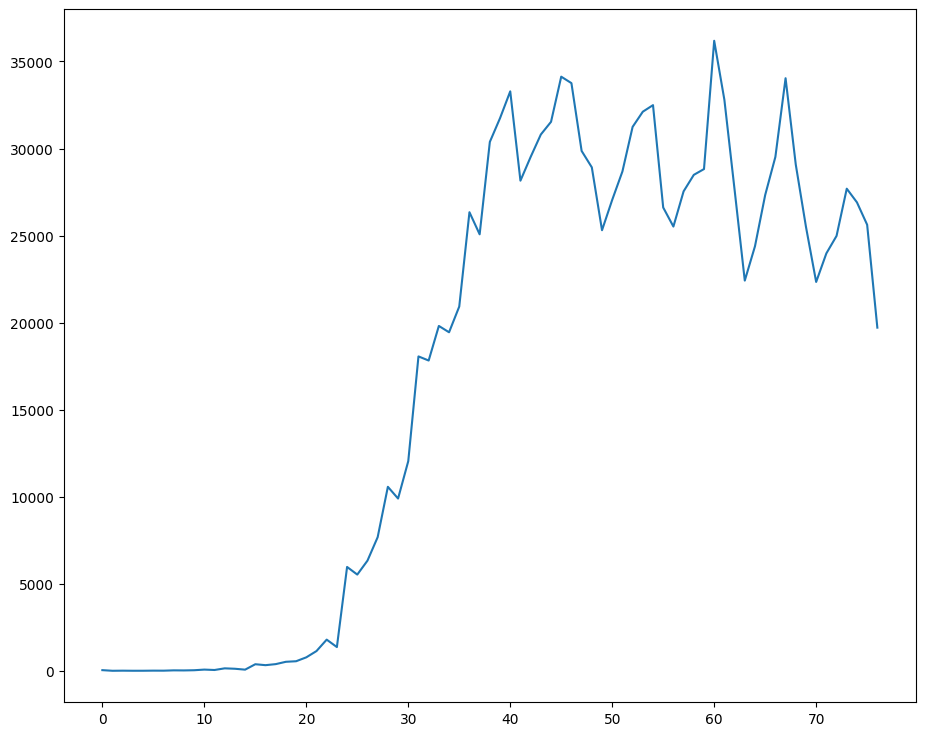

In [42]:
#A partir do 10o caso
casos_al = df_conf_pd['US'][df_conf_pd[df_conf_pd['US'] > 10].index[0]:].values
plt.plot(casos_al);

In [24]:
#Dividindo os dados do passado e os a serem previstos
casos_al_treino = casos_al[:25]
casos_al_teste = casos_al[25:]

num_proj = 10
# Regressão Linear
model = LinearRegression()
X = np.expand_dims(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), axis=1)
y = np.expand_dims(casos_al_treino, axis=1)
model.fit(X,y)
casos_al_prev = model.predict(np.expand_dims(np.linspace(0,len(casos_al_treino)+num_proj,len(casos_al_treino)+num_proj), axis=1))

#Regressão Polinimial
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
casos_al_prev_poli = lin2.predict(poly.fit_transform(np.expand_dims(np.linspace(0, len(casos_al_treino)+num_proj,len(casos_al_treino)+num_proj), axis=1)))

#SARIMA
m_sarima = auto_arima(casos_al_treino,
                     start_p=0, start_q=0, max_p=10, max_q=10,
                     d=1, m=7, seasonal = True,
                     D=1, start_Q=1, start_P=1, max_P=4, max_Q=4,
                     trace=True,
                     error_action='ignore', suppress_warnings=True,
                     stepwise=False)
safit = m_sarima.fit(casos_al_treino)
fitted = m_sarima.predict_in_sample(start=1, end=len(casos_al_treino))
casos_al_prev_sarima = m_sarima.predict(n_periods=num_proj)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=211.388, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=210.853, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=212.853, Time=0.08 sec
 ARIMA(0,1,0)(0,1,3)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,4)[7]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=211.117, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=212.853, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=214.852, Time=0.15 sec
 ARIMA(0,1,0)(1,1,3)[7]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(1,1,4)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=212.848, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=216.839, Time=1.20 sec
 ARIMA(0,1,0)(2,1,3)[7]             : AIC=218.841, Time=1.18 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(3,1,1)[7]             : AIC=216.834

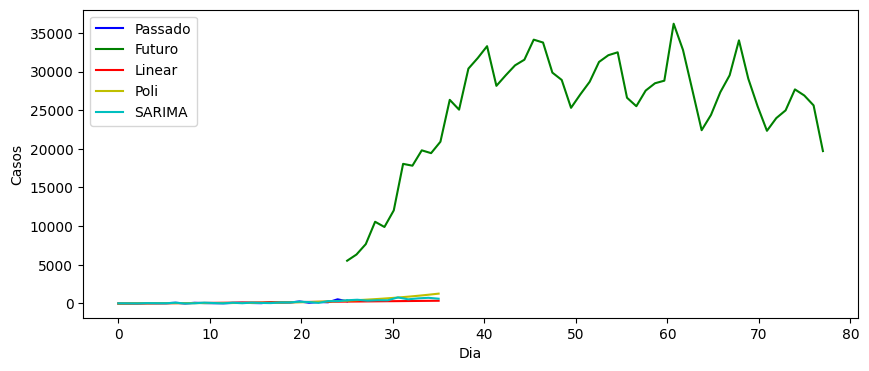

In [72]:
plt.figure(figsize=(10,4))
#plt.plot(np.linspace(0,len(casos_al), len(casos_al)), casos_al, 'b', label='Real')
plt.plot(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), casos_al_treino, 'b', label='Passado')
plt.plot(np.linspace(len(casos_al_treino), len(casos_al), len(casos_al)-len(casos_al_treino)), casos_al[len(casos_al_treino):], 'g', label='Futuro')
plt.plot(np.linspace(0,len(casos_al_treino)+num_proj, len(casos_al_treino)+num_proj), casos_al_prev, 'r', label='Linear')
plt.plot(np.linspace(0,len(casos_al_treino)+num_proj, len(casos_al_treino)+num_proj), casos_al_prev_poli, 'y', label='Poli')
plt.plot(np.linspace(len(casos_al_treino), len(casos_al_treino)+num_proj, num_proj), casos_al_prev_sarima[:], 'c', label='SARIMA')
plt.plot(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), fitted, 'c')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend();

In [77]:
#Dividindo os dados do passado e os a serem previstos
casos_al_treino = casos_al[:30]
casos_al_teste = casos_al[30:]

num_proj = 10
# Regressão Linear
model = LinearRegression()
X = np.expand_dims(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), axis=1)
y = np.expand_dims(casos_al_treino, axis=1)
model.fit(X,y)
casos_al_prev = model.predict(np.expand_dims(np.linspace(0,len(casos_al_treino)+num_proj,len(casos_al_treino)+num_proj), axis=1))

#Regressão Polinimial
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
casos_al_prev_poli = lin2.predict(poly.fit_transform(np.expand_dims(np.linspace(0, len(casos_al_treino)+num_proj,len(casos_al_treino)+num_proj), axis=1)))

#SARIMA
m_sarima = auto_arima(casos_al_treino,
                     start_p=0, start_q=0, max_p=10, max_q=10,
                     d=1, m=7, seasonal = True,
                     D=1, start_Q=1, start_P=1, max_P=4, max_Q=4,
                     trace=True,
                     error_action='ignore', suppress_warnings=True,
                     stepwise=False)
safit = m_sarima.fit(casos_al_treino)
fitted = m_sarima.predict_in_sample(start=1, end=len(casos_al_treino))
casos_al_prev_sarima = m_sarima.predict(n_periods=num_proj)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=376.357, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=378.212, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=380.211, Time=0.08 sec
 ARIMA(0,1,0)(0,1,3)[7]             : AIC=382.210, Time=0.13 sec
 ARIMA(0,1,0)(0,1,4)[7]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=378.222, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=380.211, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(1,1,3)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(1,1,4)[7]             : AIC=386.216, Time=0.68 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=380.211, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(2,1,3)[7]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=382.211, Time=0.14 sec
 ARIMA(0,1,0)(3,1,1)[7]             : AIC=384.210

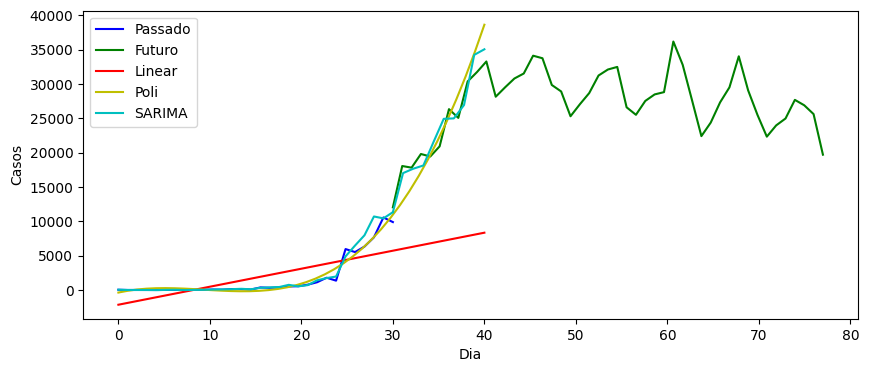

In [78]:
plt.figure(figsize=(10,4))
#plt.plot(np.linspace(0,len(casos_al), len(casos_al)), casos_al, 'b', label='Real')
plt.plot(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), casos_al_treino, 'b', label='Passado')
plt.plot(np.linspace(len(casos_al_treino), len(casos_al), len(casos_al)-len(casos_al_treino)), casos_al[len(casos_al_treino):], 'g', label='Futuro')
plt.plot(np.linspace(0,len(casos_al_treino)+num_proj, len(casos_al_treino)+num_proj), casos_al_prev, 'r', label='Linear')
plt.plot(np.linspace(0,len(casos_al_treino)+num_proj, len(casos_al_treino)+num_proj), casos_al_prev_poli, 'y', label='Poli')
plt.plot(np.linspace(len(casos_al_treino), len(casos_al_treino)+num_proj, num_proj), casos_al_prev_sarima[:], 'c', label='SARIMA')
plt.plot(np.linspace(0,len(casos_al_treino), len(casos_al_treino)), fitted, 'c')
plt.xlabel("Dia")
plt.ylabel("Casos")
plt.legend()

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Redimensionar os dados de treinamento
casos_br_treino_subset = casos_br_treino_subset.reshape(-1, 1)

# Treinar modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(casos_br_treino_subset, casos_br_teste)

# Treinar modelo de regressão polinomial
grau_pol = 2  # Grau do polinômio
polinomio = PolynomialFeatures(degree=grau_pol)
casos_br_treino_subset_pol = polinomio.fit_transform(casos_br_treino_subset)
modelo_poli = LinearRegression()
modelo_poli.fit(casos_br_treino_subset_pol, casos_br_teste)

# Fazer previsões nos dados de teste
previsoes_linear = modelo_linear.predict(casos_br_treino_subset)
previsoes_poli = modelo_poli.predict(polinomio.transform(casos_br_treino_subset))

# Calcular métricas de erro para regressão linear
mae_linear = mean_absolute_error(casos_br_teste, previsoes_linear)
mse_linear = mean_squared_error(casos_br_teste, previsoes_linear)
rmse_linear = np.sqrt(mse_linear)

# Calcular métricas de erro para regressão polinomial
mae_poli = mean_absolute_error(casos_br_teste, previsoes_poli)
mse_poli = mean_squared_error(casos_br_teste, previsoes_poli)
rmse_poli = np.sqrt(mse_poli)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SARIMA

casos_br_treino_subset = casos_br_treino[:5]  # Selecionar os primeiros 5 pontos
mae = mean_absolute_error(casos_br_treino_subset, casos_br_teste)
mse = mean_squared_error(casos_br_treino_subset, casos_br_teste)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 246.2
MSE: 68068.2
RMSE: 260.8988309671011


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cálculo das métricas de erro para Regressão Linear
mae_linear = mean_absolute_error(casos_br_teste, casos_br_treino_subset)
mse_linear = mean_squared_error(casos_br_teste, casos_br_treino_subset)
rmse_linear = np.sqrt(mse_linear)

# Impressão das métricas de erro
print("Métricas de erro para Regressão Linear:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("\n")

Métricas de erro para Regressão Linear:
MAE: 246.2
MSE: 68068.2
RMSE: 260.8988309671011




In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cálculo das métricas de erro para Regressão Polinomial
mae_poli = mean_absolute_error(casos_br_teste, casos_br_treino_subset)
mse_poli = mean_squared_error(casos_br_teste, casos_br_treino_subset)
rmse_poli = np.sqrt(mse_poli)

# Impressão das métricas de erro
print("Métricas de erro para Regressão Polinomial:")
print("MAE:", mae_poli)
print("MSE:", mse_poli)
print("RMSE:", rmse_poli)
print("\n")

Métricas de erro para Regressão Polinomial:
MAE: 246.2
MSE: 68068.2
RMSE: 260.8988309671011




Epoch 1/100
4/4 - 1s - loss: 0.1854 - 1s/epoch - 335ms/step
Epoch 2/100
4/4 - 0s - loss: 0.1729 - 12ms/epoch - 3ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1627 - 13ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1524 - 13ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1421 - 10ms/epoch - 2ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1333 - 17ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.1231 - 13ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1146 - 12ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.1057 - 12ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0969 - 11ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0878 - 11ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0808 - 12ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0724 - 13ms/epoch - 3ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0668 - 13ms/epoch - 3ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0586 - 11ms/epoch - 3ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0528 - 11ms/epoch - 3ms/step
Epoch 17/100
4/4 - 0s - loss: 0.0

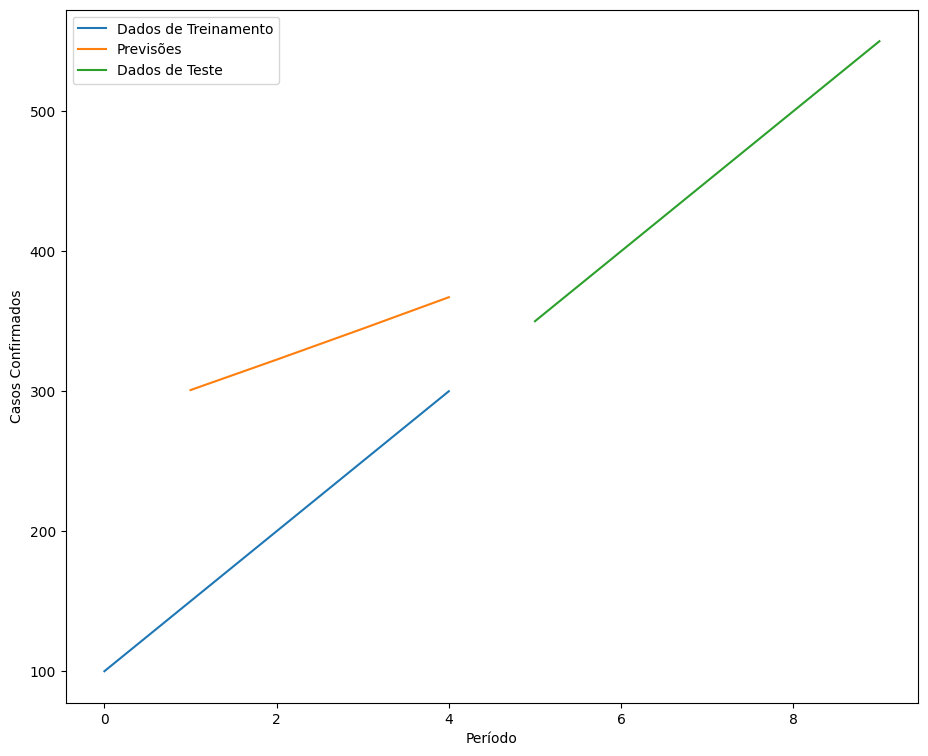

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Preparar os dados de treinamento e teste (exemplo)
casos_br_treino_subset = np.array([100, 150, 200, 250, 300])
casos_br_teste = np.array([350, 400, 450, 500, 550])

# Normalizar os dados
max_value = np.max(np.concatenate((casos_br_treino_subset, casos_br_teste)))
casos_br_treino_subset_normalized = casos_br_treino_subset / max_value
casos_br_teste_normalized = casos_br_teste / max_value

# Definir o modelo LSTM
model = Sequential()
model.add(LSTM(32, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo LSTM
X_train = np.reshape(casos_br_treino_subset_normalized[:-1], (casos_br_treino_subset_normalized[:-1].shape[0], 1, 1))
y_train = np.reshape(casos_br_treino_subset_normalized[1:], (casos_br_treino_subset_normalized[1:].shape[0], 1))
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Fazer previsões com o modelo treinado
X_test = np.reshape(casos_br_teste_normalized[:-1], (casos_br_teste_normalized[:-1].shape[0], 1, 1))
y_pred = model.predict(X_test)
y_pred_denormalized = y_pred * max_value

# Plotar os resultados
plt.plot(casos_br_treino_subset, label='Dados de Treinamento')
plt.plot(range(1, len(casos_br_treino_subset)), y_pred_denormalized, label='Previsões')
plt.plot(range(len(casos_br_treino_subset), len(casos_br_treino_subset)+len(casos_br_teste)), casos_br_teste, label='Dados de Teste')
plt.xlabel('Período')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ajustar as dimensões dos dados de teste e das previsões
y_test_denormalized = y_test_denormalized[:-1]
y_pred_denormalized = y_pred_denormalized[:-1]

# Calcular as métricas de erro
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
rmse = np.sqrt(mse)

# Imprimir as métricas de erro
print("Métricas de erro:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Métricas de erro:
MAE: 219677.3178100586
MSE: 48761487294.45689
RMSE: 220820.0337253323


In [102]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal